In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import sympy as sy
from sympy import lambdify
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import time

key = random.PRNGKey(0)



# Question 1 and 2

Total Number of Multiplications=**n*k*m**

This is because when multiplying the ith row of A with jth column of B, k elements of ith row of A are multiplied by k elements of jth column of B. Therefore, k multipications are needed for one element.
Total there are n*m elements, so it becomes (n*k)*m.




Total Number of Additions=**n*(k-1)*m**

This is because, for any element, k elements of ith row of A and jth column of B are multiplied, and then added. Since there are k elements, there will be (k-1) additions.

This is repated for (n*m) elements.So, it becomes n*(k-1)*m .

## Using python lists

In [2]:
curr_1=time.time()
def manual_mult(A,B,m):# m is the number of columns of Matrix B

    n,k=len(A),len(B)
    C= [([0]*m) for i in range(n)]
    for i in range(n):# ith row of A
      for j in range(m):# jth row of B

        for l in range(k):
          sum=A[i][l]*B[l][j]
          C[i][j]+=sum
    return(C)

A=np.random.randint(1,5,(5,6))
B=np.random.randint(1,5,(6,10))
m=B.shape[1]

mat_1=manual_mult(A,B,m)
t_1=time.time()
time_1=t_1-curr_1
mat_1


[[28, 36, 23, 35, 22, 27, 30, 42, 38, 30],
 [42, 50, 34, 44, 30, 36, 42, 56, 52, 42],
 [33, 42, 28, 35, 26, 24, 34, 43, 40, 36],
 [34, 36, 28, 34, 20, 30, 29, 46, 45, 28],
 [31, 48, 26, 45, 31, 32, 40, 51, 43, 41]]

Using Numpy

In [3]:
curr_2=time.time()
def dot(A,B):
  C=np.dot(A,B)
  return(C)
mat_2=dot(A,B)
t_2=time.time()
time_2=t_2-curr_2
mat_2

array([[28, 36, 23, 35, 22, 27, 30, 42, 38, 30],
       [42, 50, 34, 44, 30, 36, 42, 56, 52, 42],
       [33, 42, 28, 35, 26, 24, 34, 43, 40, 36],
       [34, 36, 28, 34, 20, 30, 29, 46, 45, 28],
       [31, 48, 26, 45, 31, 32, 40, 51, 43, 41]])

In [4]:
print(time_1,time_2)
print(time_1/time_2)


0.006231069564819336 0.00022935867309570312
27.16735966735967


Hence, numpy is almost 4.5 times faster than python lists.

# Question-3

### Using Quicksort algorithm, we divide and conquer the time complexity here is n*log(n) .

In [42]:
t_0_1=time.time()
def partition(array,low,high):

  pivot=array[high]
  i=low-1

  for j in range(low,high):
    if array[j]<=pivot:
      i+=1
      (array[i],array[j])=(array[j],array[i])
  (array[i+1],array[high])=(array[high],array[i+1])
  return(i+1)

def quickSort(array,low,high):
  if low<high:

    pi=partition(array,low,high)
    quickSort(array,low,pi-1)
    quickSort(array,pi+1,high)
data = [10,9,8,7,6,5,4,3,2,1]
size = len(data)

quickSort(data, 0, size - 1)
def median(data):
  size=len(data)
  if size%2==0:
    median=(data[(size//2)-1]+data[(size//2)])/2
  else:
    median=data[size//2]
  return(median)

t_1_1=time.time()
time_1=t_1_1-t_0_1

In [43]:
t_0_2=time.time()
def num_median(arr):
  c=np.median(arr)
  return(c)
t_1_2=time.time()
time_2=t_1_2-t_0_2

In [44]:
print(time_1,time_2)
print(time_1/time_2)


0.0005137920379638672 0.00013947486877441406
3.6837606837606836


### Numpy is almost 5.4 times faster than the python lists here.

# Question 4,5 and 6

In [8]:
X=np.random.uniform(5.,10.,(5,))
Y=np.random.uniform(6.,11.,(5,))

X_j=jnp.array(X)
Y_j=jnp.array(Y)

## Question-4: Manually

In [9]:
def f(x,y):
  a=(x**2)*y +(y**3)*jnp.sin(x)
  return(a)

def df_dx(x,y):
  a=2*(x*y)+(y**3)*np.cos(x)
  return(a)

def df_dy(x,y):
  a=(x**2)+(3*(y**2))*np.sin(x)
  return(a)

print(df_dx(X,Y),df_dy(X,Y))

[ -345.85341975 -1055.95455686  -138.10941278  -569.63786841
  -140.34385499] [175.04790356 153.11547479 365.01204949 -49.73377495  84.65580338]


# Question-5: Using JAX

In [10]:
grad_h=grad(f,argnums=[0,1])
lst=np.zeros((len(X),))
for i in range(len(X)-1):
  g=grad_h(X[i],Y[i])
  print(g)




(Array(-345.85333, dtype=float32), Array(175.04794, dtype=float32))
(Array(-1055.9546, dtype=float32), Array(153.11562, dtype=float32))
(Array(-138.10902, dtype=float32), Array(365.0121, dtype=float32))
(Array(-569.6377, dtype=float32), Array(-49.73388, dtype=float32))


## Question-6: Using Sympy

In [11]:
p,q=sy.symbols('p ,q')
func=(p**2)*q+(q**3)*sy.sin(p)# Writing the function symbolically
func_p=sy.diff(func,p)
func_q=sy.diff(func,q)
func

p**2*q + q**3*sin(p)

In [12]:
f_p=lambdify([p,q],func_p,"numpy")# Gradient wrt p

f_q=lambdify([p,q],func_q,"numpy")# Gradient wrt q

print(f_p(X,Y),f_q(X,Y))# Plugging X and Y as inputs in the gradient functions

[ -345.85341975 -1055.95455686  -138.10941278  -569.63786841
  -140.34385499] [175.04790356 153.11547479 365.01204949 -49.73377495  84.65580338]


# Question-7

In [13]:
dic_1={"Roll Number":1,"Name":"N","Marks":{"Maths":100,"English":70}}# This one corresponds to branch-1
dic_1_2={"Branch 1":dic_1,"Branch 2":[]}# This one corresponds to 2022
dic_22=dic_1_2# First entry of the main dict
dic_23={"Branch 1":[],"Branch 2":[]}
dic_24={"Branch 1":[],"Branch 2":[]}
dic_25={"Branch 1":[],"Branch 2":[]}

dic={"2022":dic_22,"2023":dic_23,"2023":dic_23,"2024":dic_24,"2025":dic_25}
dic


{'2022': {'Branch 1': {'Roll Number': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70}},
  'Branch 2': []},
 '2023': {'Branch 1': [], 'Branch 2': []},
 '2024': {'Branch 1': [], 'Branch 2': []},
 '2025': {'Branch 1': [], 'Branch 2': []}}

# Question-8

In [71]:
class Year(object):# Year

  def __init__(self,year):
    self.year=year

  def getYear(self):
    return(self.year)

class Branch(Year):# Branch as a child class of Year

  def __init__(self,year,branch):
    Year.__init__(self,year)
    self.branch=branch

  def getBranch(self):
    return(self.branch)

class details(Branch):# details contain Name, marks and roll_no, as a child of Branch

  def __init__(self,year,branch,roll_no,Name):
    Branch.__init__(self,year,branch)
    self.Name=Name
    self.roll_no=roll_no


  def getDetails(self):
    return([self.roll_no,self.Name])

class Marks(details):

  def __init__(self,year,branch,roll_no,name,maths,english):
    self.maths=maths
    self.english=english
    super().__init__(year,branch,roll_no,name)

  def getMarks(self):
    return([self.maths,self.english])# Prints the marks of maths and english

a=Marks(2022,"Branch 1",1,"N",100,70)
a.getMarks()



[100, 70]

## Question-9

In [21]:
x=np.arange(0.5,100.5,0.5)

In [22]:
def a(k):
  return k

def b(k):
  return(k**2)

def c(k):
  return(x**3/100)

def d(k):
  #import numpy as np
  return(np.sin(k))

def e(k):
  #import numpy as np
  y=np.sin(k)/k
  return(y)

def f(k):
  #import numpy as np
  y=np.log(k)
  return(y)

def g(k):
  #import numpy as np

  return(np.exp(k))


1. y=x

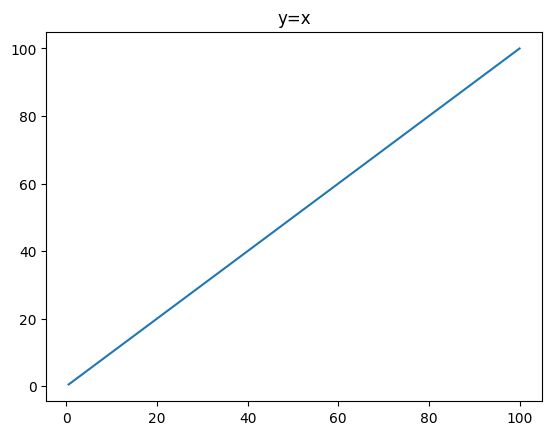

In [23]:
plt.plot(x,a(x))
plt.title("y=x")
plt.show()

2. y=x^2

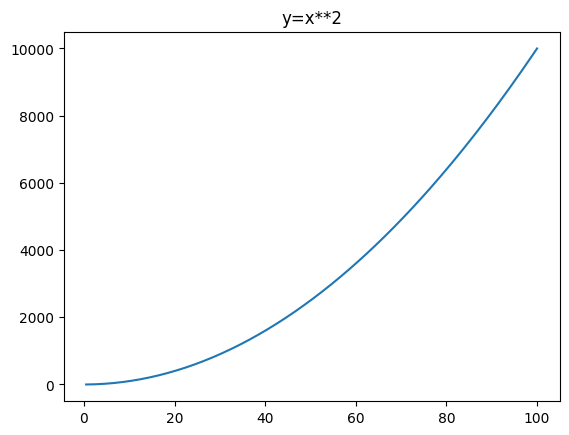

In [24]:
plt.plot(x,b(x))
plt.title("y=x**2")
plt.show()

3. y=x**3/100

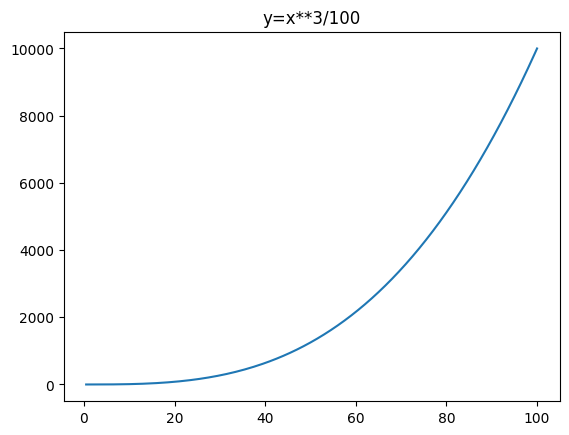

In [25]:
plt.plot(x,c(x))
plt.title("y=x**3/100")
plt.show()

4.y=Sin(x)

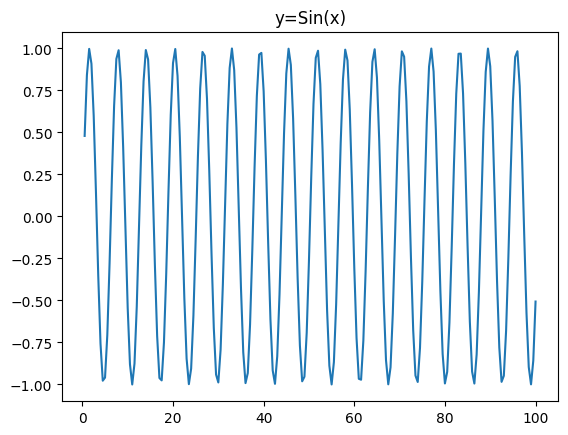

In [26]:
plt.plot(x,d(x))
plt.title('y=Sin(x)')
plt.show()


5. y=Sin(x)/x

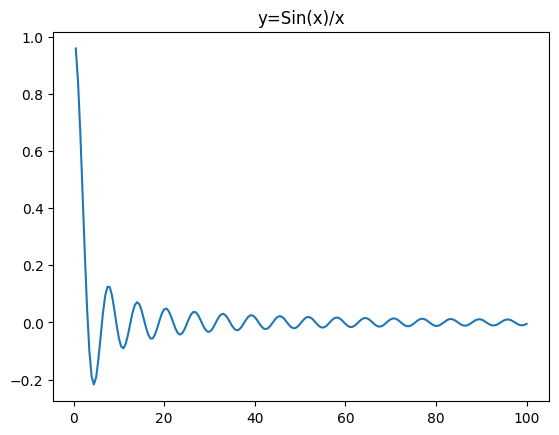

In [27]:
plt.plot(x,e(x))
plt.title("y=Sin(x)/x")
plt.show()

6. y=Log(x)

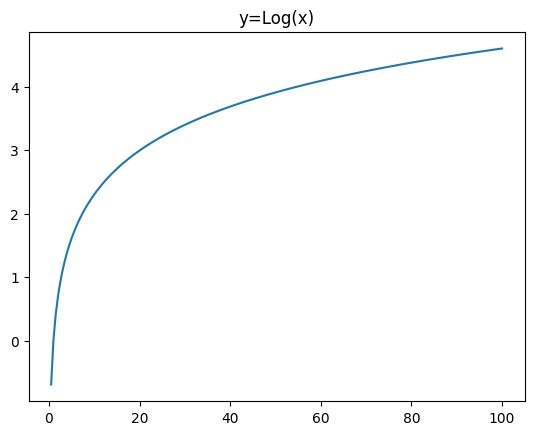

In [28]:
plt.plot(x,f(x))
plt.title("y=Log(x)")
plt.show()

7. y=Exp(x)

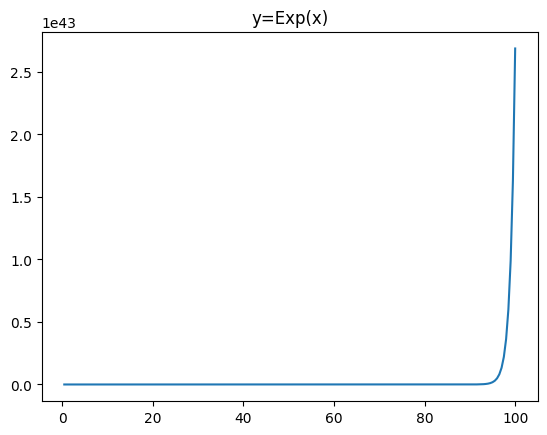

In [29]:
plt.plot(x,g(x))
plt.title("y=Exp(x)")

plt.show()


# Questions 10 and 11

In [30]:
arr=np.zeros((20,5))
arr=np.random.uniform(1,2,(20,5))
df=pd.DataFrame(arr,columns=["a","b","c","d","e"])
df

,a,b,c,d,e
0,1.098954,1.201182,1.203954,1.801012,1.041090
1,1.747202,1.928617,1.587563,1.880681,1.230562
2,1.417275,1.013344,1.043874,1.383107,1.981518
3,1.698205,1.154830,1.400956,1.686782,1.647850
4,1.448735,1.516542,1.971178,1.584383,1.754596
5,1.779315,1.274107,1.387838,1.871619,1.743528
6,1.909606,1.053015,1.820136,1.897921,1.067862
7,1.967831,1.801678,1.840179,1.831502,1.179400
8,1.432267,1.034448,1.191877,1.391896,1.455771
9,1.851008,1.479971,1.980571,1.362845,1.911139


##Finding Row with the Lowest mean

In [31]:
mean=np.mean(df,axis=1)
r=np.argmin(mean)+1
r

1

###8th Row has the Lowest Mean

Finding column with the highest standard deviation

In [32]:
std=np.std(df,axis=0)
c=np.argmax(std)+1
c

5

### 5th Column has highest Standard Deviation

## Creating Column f

In [33]:
f=np.sum(df,axis=1)
gf=copy.deepcopy(df)
gf["f"]=f
gf

,a,b,c,d,e,f
0,1.098954,1.201182,1.203954,1.801012,1.041090,6.346192
1,1.747202,1.928617,1.587563,1.880681,1.230562,8.374626
2,1.417275,1.013344,1.043874,1.383107,1.981518,6.839119
3,1.698205,1.154830,1.400956,1.686782,1.647850,7.588623
4,1.448735,1.516542,1.971178,1.584383,1.754596,8.275433
5,1.779315,1.274107,1.387838,1.871619,1.743528,8.056406
6,1.909606,1.053015,1.820136,1.897921,1.067862,7.748539
7,1.967831,1.801678,1.840179,1.831502,1.179400,8.620590
8,1.432267,1.034448,1.191877,1.391896,1.455771,6.506258
9,1.851008,1.479971,1.980571,1.362845,1.911139,8.585535


## Setting condition of elements comparing with 8.

In [34]:
indices_l=np.where(gf["f"]<8)
row_indices_l=indices_l[0]
row_indices_l# Indices of rows where value of element in f is <8

indices_g=np.where(gf["f"]>8)
row_indices_g=indices_g[0]


In [35]:
gf["g"]=np.zeros((20,))

for i in row_indices_l:
  gf["g"][i]="LT8"
for i in row_indices_g:
  gf["g"][i]="GT8"
gf


,a,b,c,d,e,f,g
0,1.098954,1.201182,1.203954,1.801012,1.041090,6.346192,LT8
1,1.747202,1.928617,1.587563,1.880681,1.230562,8.374626,GT8
2,1.417275,1.013344,1.043874,1.383107,1.981518,6.839119,LT8
3,1.698205,1.154830,1.400956,1.686782,1.647850,7.588623,LT8
4,1.448735,1.516542,1.971178,1.584383,1.754596,8.275433,GT8
5,1.779315,1.274107,1.387838,1.871619,1.743528,8.056406,GT8
6,1.909606,1.053015,1.820136,1.897921,1.067862,7.748539,LT8
7,1.967831,1.801678,1.840179,1.831502,1.179400,8.620590,GT8
8,1.432267,1.034448,1.191877,1.391896,1.455771,6.506258,LT8
9,1.851008,1.479971,1.980571,1.362845,1.911139,8.585535,GT8


In [36]:
n=len(row_indices_l)
n

13

15 rows have value of clomn f<8

In [37]:
hf=gf.groupby('g')
af=hf.get_group("LT8")# Grouping the dataframe based on values of LT8 and GT8
std_l=np.std(af,axis=0)
print(std_l["f"])

0.5931558849661162


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Standard deviation of the column f where values are less than 8=0.294

In [38]:
bf=hf.get_group("GT8")
std_g=np.std(bf,axis=0)
print(std_g["f"])


0.2879596195422479


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Standard Deviation of column f where values are greater than 8=0.37759711293321735

# Question 12

In [39]:
# This can be explained by three examples

a=np.array([10.,15.,20])
b=np.array([5.,5.,5.])
c=5
print(a*b,a*c)
# Here,the smaller array(c) is stretched to fit the dimensions of the larger array, and hence multiplication(element-wise) becomes compatible.



[ 50.  75. 100.] [ 50.  75. 100.]


In [40]:
# One more example

A=np.array([[10,10,10],[20,20,20],[30,30,30]])
B=np.array([5,10,20])
print(A/B)
# Although dimensions of A and B don't match, B apparantely changes from [5,10,20]-->>[[5,5,5],[10,10,10],[20,20,20]], to fit the dimensionality of A

[[2.  1.  0.5]
 [4.  2.  1. ]
 [6.  3.  1.5]]


In [41]:
# But, this fails when we input...

B_f=np.array([5,10,15,20])
A/B_f

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

## This had to fail because in  no way could the array stretch to accomodate the dimensions of the larger Matrix

In [64]:
A=np.random.randint(2,20,(10,))
A

array([14,  8, 11, 14,  7,  3, 19,  3, 14,  9])

In [69]:
def solve(arr,min_val=np.inf,index=-1,count=-1):

  for i in arr:
    index+=1
    if i<min_val:
      min_val=i
      count=index
  return(count)


def num_solve(A):
  C=np.argmin(A)
  return(C)

ind_1=solve(A)
ind_2=num_solve(A)
print(ind_1,ind_2)

5 5


Both are coming equal.